# Plot classification performace (step 3)

In [36]:
import dask.dataframe as ddf
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy import stats

from Metrics import ir_metrics

BASE_PATH = "/Users/erotundo/PycharmProjects/DatasetAnnotatorProj/Analysis/Data/travel/"
PRED_PATH = BASE_PATH + "predictions_threads_acceptedOnly_ansCountGte2_binaryBestAnswer/"


# plotting settings
sns.set(style="white", palette="muted", color_codes=True)
PLOTS_PATH = 'output/travel/'
PLOTS_FORMATS = ['.pdf', '.png']

## Helper functions for computing metrics

In [37]:
def ndcg_at_k(df, k, col):
    """
    Input: whole DF of all predictions
    Returns: array with a metric for each thread in DF
    """
    metrics = []
    for name, group in df.groupby(by='thread_id'):
        metrics.append(ir_metrics.ndcg_at_k(df[col], k))
    return metrics

def mrr(df, col):
    """
    Input: whole DF of all predictions
    Returns: array with a metric for each thread in DF
    """
    metrics = []
    for name, group in df.groupby(by='thread_id'):
        metrics.append(ir_metrics.mean_reciprocal_rank(df[col]))
    return metrics

    
def add_random_predictions(df):
    """
    Input: whole DF of all predictions
    Returns: DF with +1 column for random predictions
    """
    rnd_preds_all = []
    for name, group in df.groupby(by='thread_id'):
        rnd_preds = np.random.randint(1, size=group.shape[0])
        position_for_1 = np.random.randint(group.shape[0], size=1)
        rnd_preds[position_for_1] = 1
        rnd_preds_all.extend(rnd_preds)
    df['rnd_pred'] = rnd_preds_all
    return df

## Compute metrics

In [ ]:
mean_ndcg_data = dict()
ci_ndcg_data = dict()
mean_mrr_data = dict()
ci_mrr_data = dict()

files = ['SVC']

for file_name in files:
    model_name = file_name
    print model_name
    
    # init
    mean_ndcg_data[model_name] = []
    mean_ndcg_post_data[model_name] = []
    mean_mrr_data[model_name] = []
    ci_ndcg_data[model_name] = []
    ci_ndcg_post_data[model_name] = []
    ci_mrr_data[model_name] = []
    
    # read predictions
    df_model = pd.read_csv(PRED_PATH + file_name + "_predictions.csv")\
        .drop('Unnamed: 1', axis=1)\
        .drop('thread_id.1', axis=1)\
        .drop('pred_proba_class0', axis=1)\
        .drop('pred_proba_class1', axis=1)\
        .drop('post_id', axis=1)    
    
    # generate random predictions
    df_model = add_random_predictions(df_model)
    
    # compute metrics for different k
    for k in xrange(1, 11):
        print k,
        mean_ndcg_data[model_name].append(np.mean(ndcg_at_k(df_model, k, 'y_pred')))
        mean_mrr_data[model_name].append(np.mean(mrr(df_model, 'y_pred')))

SVC
1

## Time for plotting...

In [ ]:
# plot NDCG@1 bars

fig = plt.figure(figsize=(4, 2))
ax1 = fig.add_subplot(111)

ax1.bar(0,  mean_ndcg_data['AdaBoostClassifier'][0],  label='AdaBoostClassifier')
ax1.bar(1,  mean_ndcg_data['RandomForestClassifier'][0],  label='RandomForestClassifier')
ax1.bar(2,  mean_ndcg_data['SVC'][0],  label='SVC')
ax1.bar(3,  mean_ndcg_data['LogisticRegression'][0],  label='LogisticRegression')
ax1.bar(4,  mean_ndcg_data['KNeighborsClassifier'][0],  label='KNeighborsClassifier')

plt.ylabel('nDCG@1', fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=8)

plt.grid(alpha=0.7, linestyle='dotted')
plt.legend(fontsize=8)
plt.tight_layout(pad=0.3)

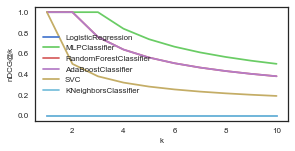

In [30]:
# plot NDCG curves

fig = plt.figure(figsize=(4, 2))
ax1 = fig.add_subplot(111)

for model_name in mean_ndcg_data.keys():
    ax1.plot(range(1,11), 
             mean_ndcg_data[model_name], 
             label=model_name)

plt.xlabel('k', fontsize=8)
plt.ylabel('nDCG@k', fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=8)

plt.grid(alpha=0.0, linestyle='dotted')
plt.legend(fontsize=8)
plt.tight_layout(pad=0.3)

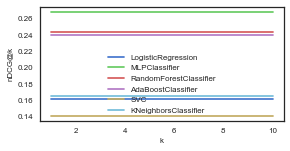

In [32]:
# plot MRR curves

fig = plt.figure(figsize=(4, 2))
ax1 = fig.add_subplot(111)

for model_name in mean_ndcg_data.keys():
    ax1.plot(range(1,11), 
             mean_mrr_data[model_name], 
             label=model_name)

plt.xlabel('k', fontsize=8)
plt.ylabel('nDCG@k', fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=8)

plt.grid(alpha=0.0, linestyle='dotted')
plt.legend(fontsize=8)
plt.tight_layout(pad=0.3)

## Featues importance (RF)

In [ ]:
# TODO

## GridSearchCV analysis

In [ ]:
# TODO